In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_6/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_6


In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [11]:
with open('Clothing_Shoes_and_Jewelry_5.json') as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)

In [12]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [13]:
data.overall.unique()

array([5., 4., 3., 1., 2.])

In [15]:
df = data[['reviewText',	'overall']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   reviewText  278677 non-null  object 
 1   overall     278677 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


In [16]:
df['WORDS'] = df['reviewText'].map(lambda x: len(x.split()))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviewText,overall,WORDS
0,This is a great tutu and at a really great pri...,5.0,35
1,I bought this for my 4 yr old daughter for dan...,5.0,61
2,What can I say... my daughters have it in oran...,5.0,62
3,"We bought several tutus at once, and they are ...",5.0,76
4,Thank you Halo Heaven great product for Little...,5.0,80


In [17]:
df['WORDS'].describe()

count    278677.000000
mean         59.953046
std          61.289861
min           0.000000
25%          26.000000
50%          41.000000
75%          70.000000
max        3882.000000
Name: WORDS, dtype: float64

In [20]:
df['overall'] = df['overall'].map(lambda x: 0 if x<3.0 else 1 if x==3.0 else 2) # 0: dislike, 1: neutral, 2: like
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviewText,overall,WORDS
0,This is a great tutu and at a really great pri...,2,35
1,I bought this for my 4 yr old daughter for dan...,2,61
2,What can I say... my daughters have it in oran...,2,62
3,"We bought several tutus at once, and they are ...",2,76
4,Thank you Halo Heaven great product for Little...,2,80


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of customer sentiment level')

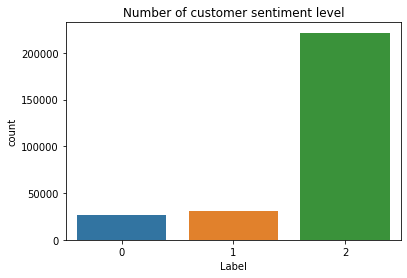

In [21]:
sns.countplot(df.overall)
plt.xlabel('Label')
plt.title('Number of customer sentiment level')

In [22]:
X = df.reviewText
Y = df.overall

In [34]:
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)
dummy_Y = to_categorical(encoder_Y)

In [35]:
Y = dummy_Y

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [37]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words= max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [38]:
print(sequences[:2])

[[12, 633, 243, 226, 356, 7, 78, 894, 9, 951, 3, 110, 7, 24, 106, 16, 151, 30, 385, 191, 110, 227, 1, 134, 13, 122, 3, 13, 171, 385, 173, 4, 254, 66, 841, 559, 27], [2, 1, 68, 30, 26, 189, 68, 91, 64, 2, 812, 66, 905, 87, 5, 450, 3, 17, 289, 449, 7, 20, 28, 289, 50, 2, 33, 29, 260, 3, 42, 347, 5, 2, 77, 29, 949, 3, 13, 30, 34, 118, 2, 38, 21]]


In [39]:
sequences_matrix[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 633, 243, 226,
        356,   7,  78, 894,   9, 951,   3, 110,   7,  24, 106,  16, 151,
         30, 385, 191, 110, 227,   1, 134,  13, 122,   3,  13, 171, 385,
        173,   4, 254,  66, 841, 559,  27],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [40]:
model = Sequential()
model.add(Embedding(max_words, 50))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [41]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics= ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 96,851
Trainable params: 96,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

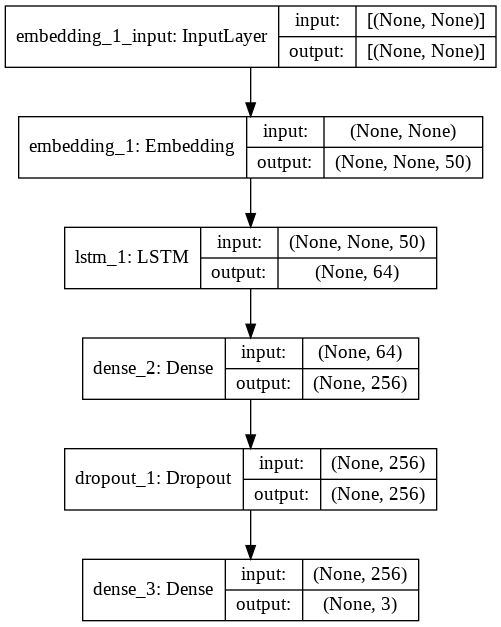

In [43]:
plot_model(model, to_file='LSTM_model.png', show_shapes=True)
Image(filename='LSTM_model.png')

In [44]:
history = model.fit(sequences_matrix, Y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_split = 0.2,
                    callbacks = [EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
1220/1220 [==============================] - 235s 191ms/step - loss: 0.4571 - accuracy: 0.8235 - val_loss: 0.4463 - val_accuracy: 0.8205
Epoch 2/50
1220/1220 [==============================] - 235s 192ms/step - loss: 0.3978 - accuracy: 0.8424 - val_loss: 0.3969 - val_accuracy: 0.8417
Epoch 3/50
1220/1220 [==============================] - 235s 192ms/step - loss: 0.3695 - accuracy: 0.8535 - val_loss: 0.3857 - val_accuracy: 0.8454
Epoch 4/50
1220/1220 [==============================] - 234s 192ms/step - loss: 0.3548 - accuracy: 0.8575 - val_loss: 0.3672 - val_accuracy: 0.8518
Epoch 5/50
1220/1220 [==============================] - 235s 192ms/step - loss: 0.3460 - accuracy: 0.8613 - val_loss: 0.3963 - val_accuracy: 0.8430
Epoch 6/50
1220/1220 [==============================] - 235s 192ms/step - loss: 0.3382 - accuracy: 0.8646 - val_loss: 0.3597 - val_accuracy: 0.8549
Epoch 7/50
1220/1220 [==============================] - 234s 192ms/step - loss: 0.3311 - accuracy: 0.8667 - val_

In [45]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [46]:
accr = model.evaluate(test_sequences_matrix, Y_test)

2613/2613 [==============================] - 54s 21ms/step - loss: 0.3652 - accuracy: 0.8615


In [47]:
print('Test set\n   Loss: {:0.3f}\n   Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
   Loss: 0.365
   Accuracy: 0.861


In [48]:
from tensorflow.keras.models import load_model
model.save('LSTM_spam_model.h5')